In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

git version 2.25.1


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4966787890337083842
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14343274496
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13174809885669726043
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
!pip install matplotlib
!pip install google-auth google-auth-oauthlib google-auth-httplib2 google-api-python-classification_report

#importing Libraries
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
%matplotlib inline
import os
import plotly.offline as py
import plotly.graph_objs as go


from numpy.random import randn
from matplotlib import pyplot
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)


from keras import layers
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

#for google drive
from google.colab import drive
drive.mount("/content/gdrive")
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement google-api-python-classification_report (from versions: none)
ERROR: No matching distribution found for google-api-python-classification_report


Mounted at /content/gdrive


In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/PIDD.csv')
print (data.shape)
print (data.tail())
print (data.columns)

(768, 9)
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
data.info()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
print(data['Outcome'].value_counts())
print(f"Approximately {(data['Outcome'].value_counts()[0]/data['Outcome'].size*100):.4f}% of patients don't have diabetes.")
print(f"Approximately {(data['Outcome'].value_counts()[1]/data['Outcome'].size*100):.4f}% of patients have diabetes.")

0    500
1    268
Name: Outcome, dtype: int64
Approximately 65.1042% of patients don't have diabetes.
Approximately 34.8958% of patients have diabetes.


<Axes: ylabel='count'>

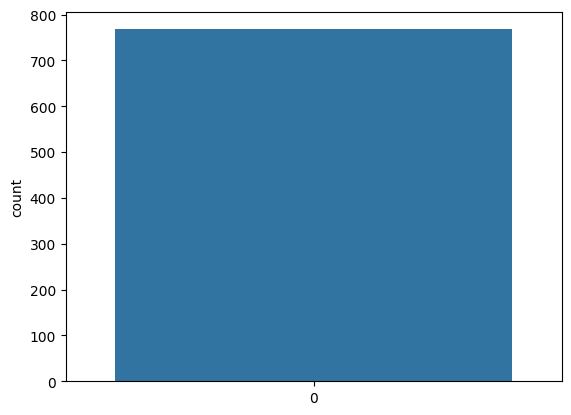

In [ ]:
sns.countplot(data['Outcome'])

In [ ]:
# this separates the outcome label from other features of the dataset
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

label = ['Outcome']
# def _init_(self,x,y):
#     self.x=x
#     self.y=y
X = data[features]
y = data[label]

In [ ]:
print (y)

     Outcome
0          1
1          0
2          1
3          0
4          1
..       ...
763        0
764        0
765        0
766        1
767        0

[768 rows x 1 columns]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_true_train, X_true_test, y_true_train, y_true_test = train_test_split(X, y, test_size=0.30, random_state=42)
clf_true = RandomForestClassifier(n_estimators=100)
clf_true.fit(X_true_train,y_true_train)

y_true_pred=clf_true.predict(X_true_test)
print("Base Accuracy:",metrics.accuracy_score(y_true_test, y_true_pred))
print("Base classification report:")
print(metrics.classification_report(y_true_test, y_true_pred))

Base Accuracy: 0.7532467532467533
Base classification report:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
##to handle Outliers
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)
## to Scale the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

<Axes: >

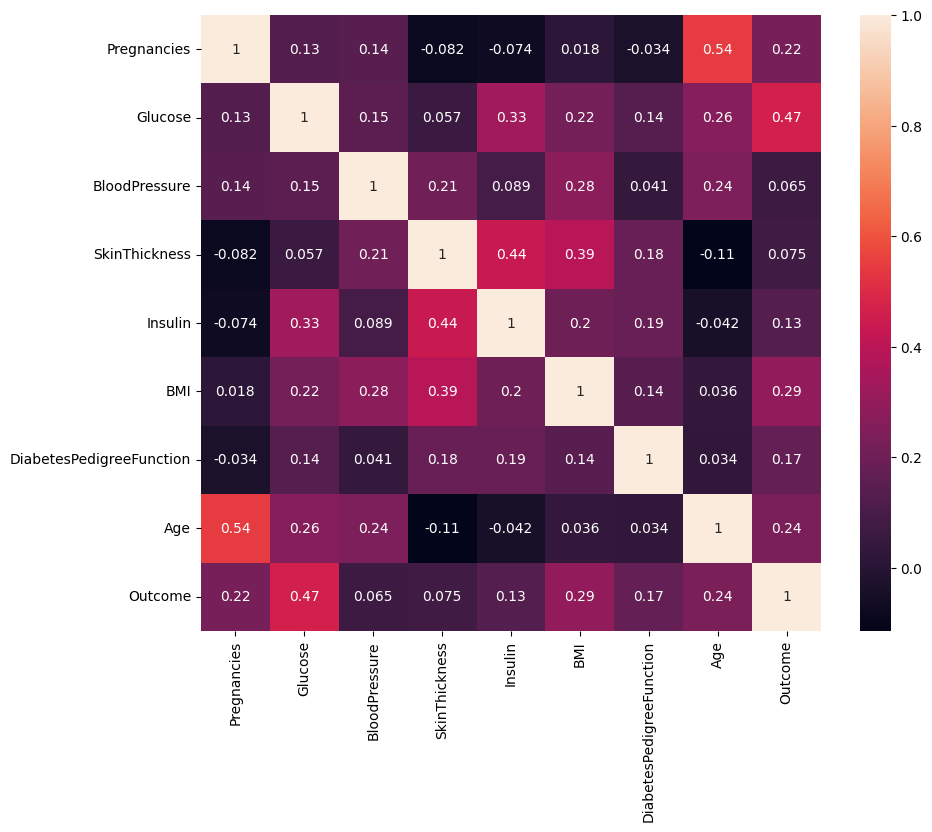

In [ ]:
plt.figure(figsize=(10, 8)) 
sns.heatmap(data.corr(), annot =True)

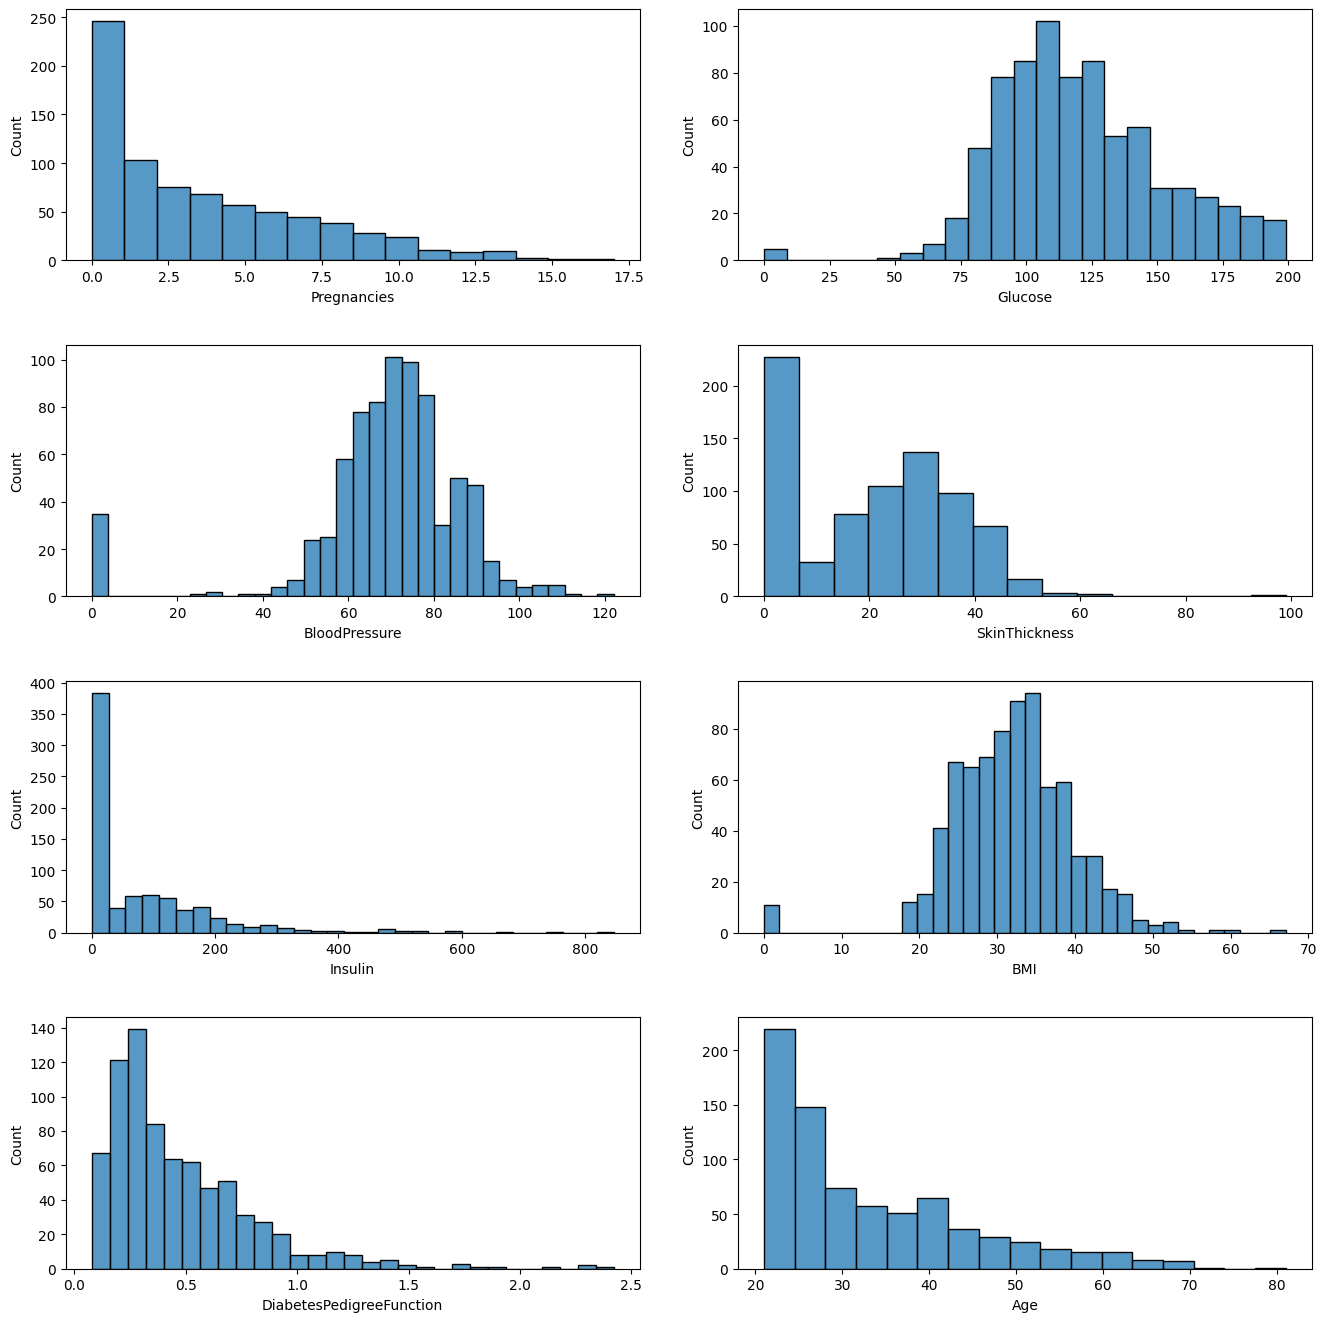

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(14,14))
fig.tight_layout(pad=4.0)

for i,j in enumerate(data.columns[:-1]):
    sns.histplot(data[j], ax=axes[i//2, i%2])

In [ ]:
ndata = data.copy(deep = True)
## count number entrries whose value is zero in each column
(ndata == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
##convert all zeros in Glucose, BloodPressure, SkinThickness, Insulin, and BMI to NaN values to manipulate this data 
#because they are important for diabetes prediction
colsToFix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
ndata[colsToFix] = ndata[colsToFix].replace(0, np.NaN)
ndata.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [ ]:

def pidStats(dFrame):
    """
    Description
    ----
    Outputs the general statistical description of the dataframe,
    outputs the correlation heatmap, and outputs a distribution plot.
    
    Parameters
    ----
    dFrame(DataFrame):
        The dataframe for which information will be displayed.
        
    Returns
    ----
    Nothing.
    
    """
    # Description
    print("Descriptive Stats:")
    display(dFrame.describe().T)
    
    # Heatmap
    plt.figure(figsize=(10, 8)) 
    plt.title("Heatmap", fontsize = 'x-large')
    sns.heatmap(dFrame.corr(), annot =True)
    
    # Distribution
    ### NOTE: I changed histplot to distplot
    fig, axes = plt.subplots(4, 2, figsize=(14,14))
    fig.suptitle("Distribution Plot", y=0.92, fontsize='x-large')
    fig.tight_layout(pad=4.0)

    for i,j in enumerate(data.columns[:-1]):
        #sns.distplot(dFrame[j], ax=axes[i//2, i%2])
        sns.histplot(dFrame[j], ax=axes[i//2, i%2], kde=True, stat="density", linewidth=0)

    

Descriptive Stats:


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


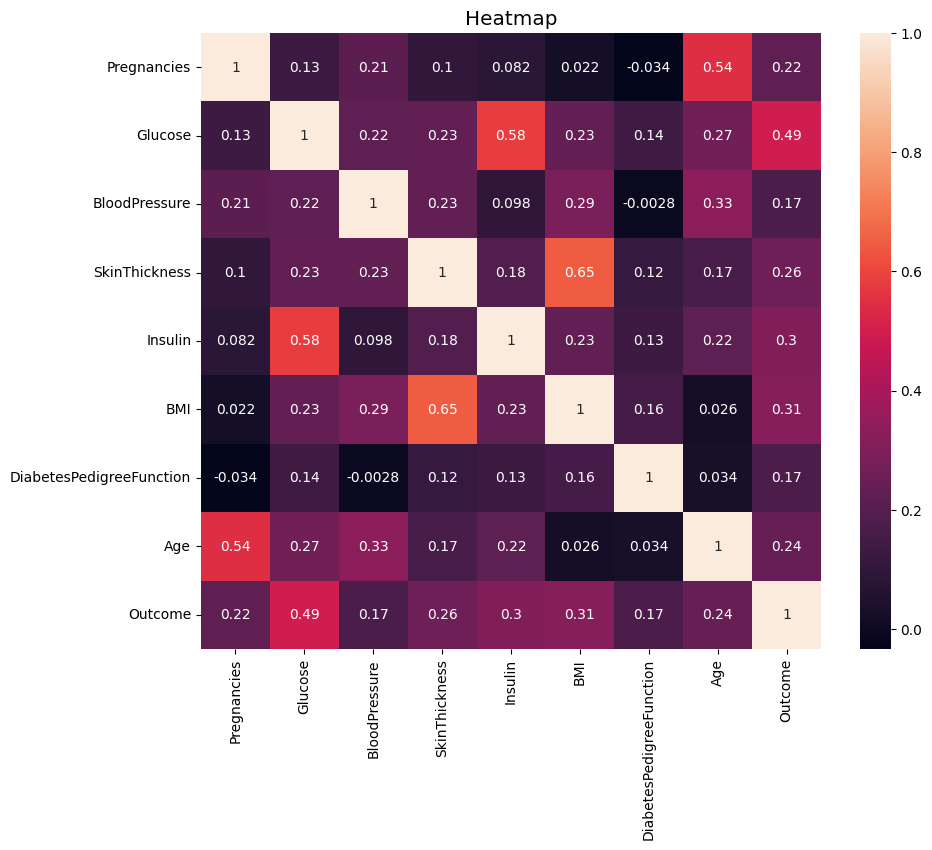

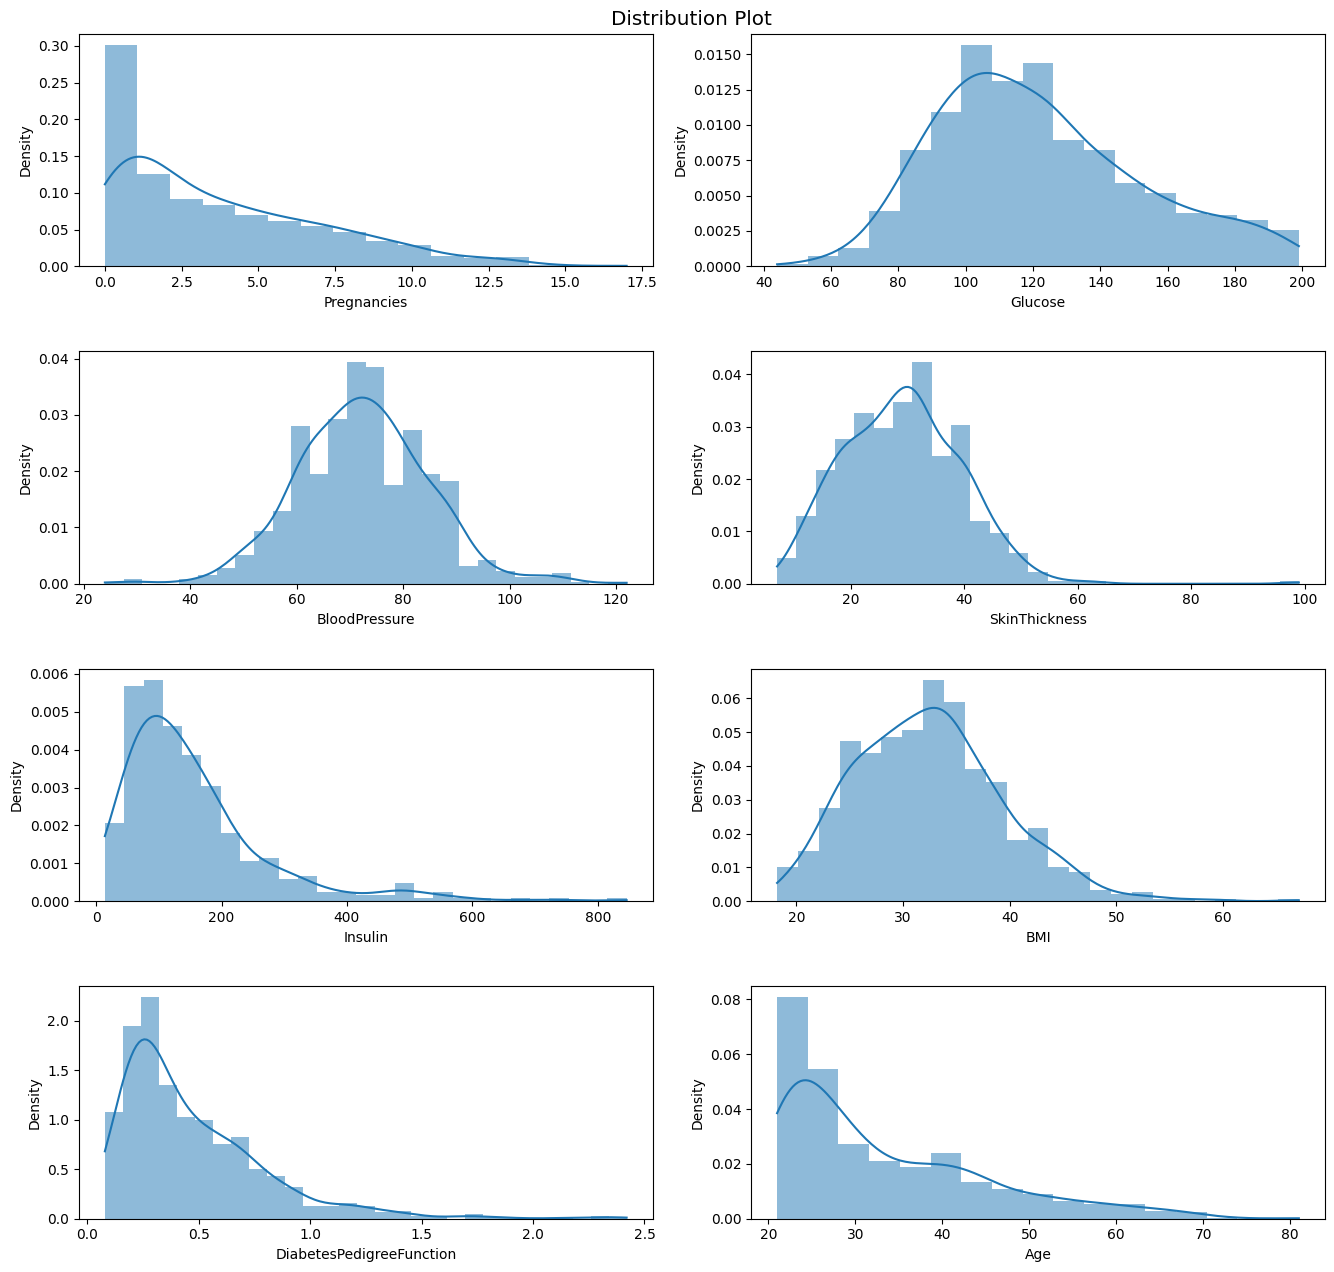

In [ ]:
pidStats(ndata)

In [ ]:
### As a general rule of thumb:
### - If skewness is less than -1 or greater than 1, the distribution is highly skewed.<br>
### - If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.<br>
### - If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.<br>
dfMeanMed = ndata.copy(deep = True)
dfMeanMed[colsToFix].skew()

Glucose          0.530989
BloodPressure    0.134153
SkinThickness    0.690619
Insulin          2.166464
BMI              0.593970
dtype: float64

In [ ]:
##For this dataset, if skewness value is between -0.5 and 0.5, I'll use the mean to impute missing values, else, I will use median. 
dfMeanMed['Glucose'].fillna(dfMeanMed['Glucose'].median(), inplace = True)
dfMeanMed['SkinThickness'].fillna(dfMeanMed['SkinThickness'].median(), inplace = True)
dfMeanMed['Insulin'].fillna(dfMeanMed['Insulin'].median(), inplace = True)
dfMeanMed['BMI'].fillna(dfMeanMed['BMI'].median(), inplace = True)
dfMeanMed['BloodPressure'].fillna(dfMeanMed['BloodPressure'].mean(), inplace = True)

In [ ]:
dfMeanMed.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Descriptive Stats:


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.000000,140.25000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.000000,32.00000,99.00
Insulin,768.0,140.671875,86.383060,14.000,121.50000,125.000000,127.25000,846.00
BMI,768.0,32.455208,6.875177,18.200,27.50000,32.300000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.00000,1.00


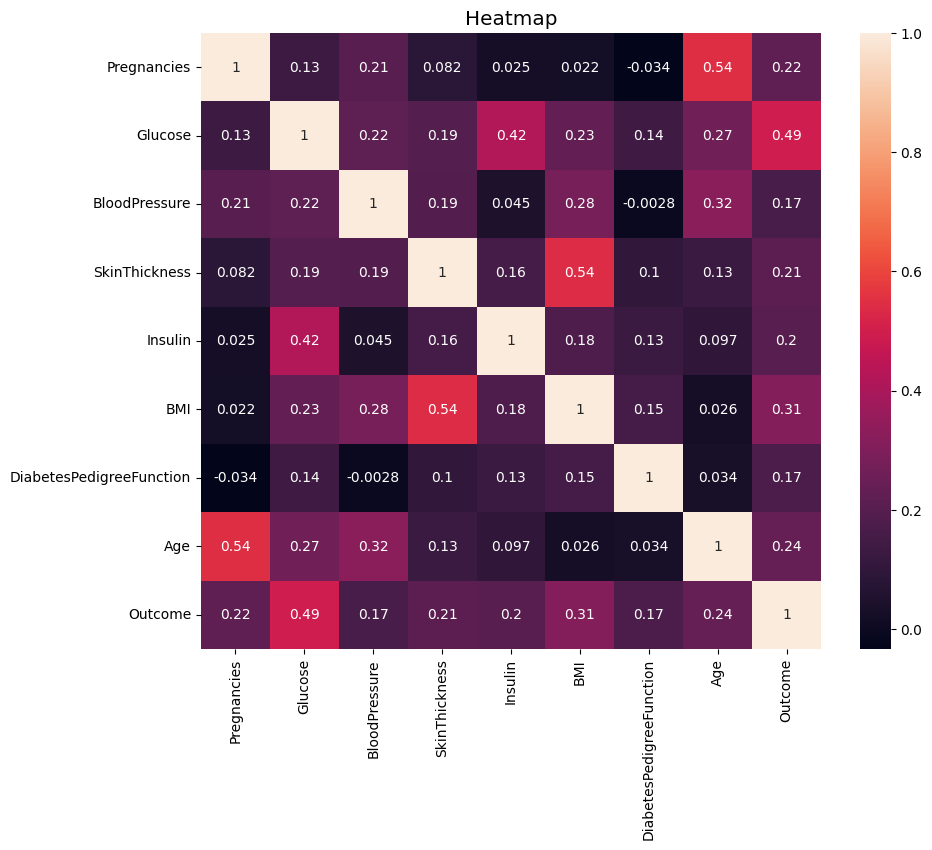

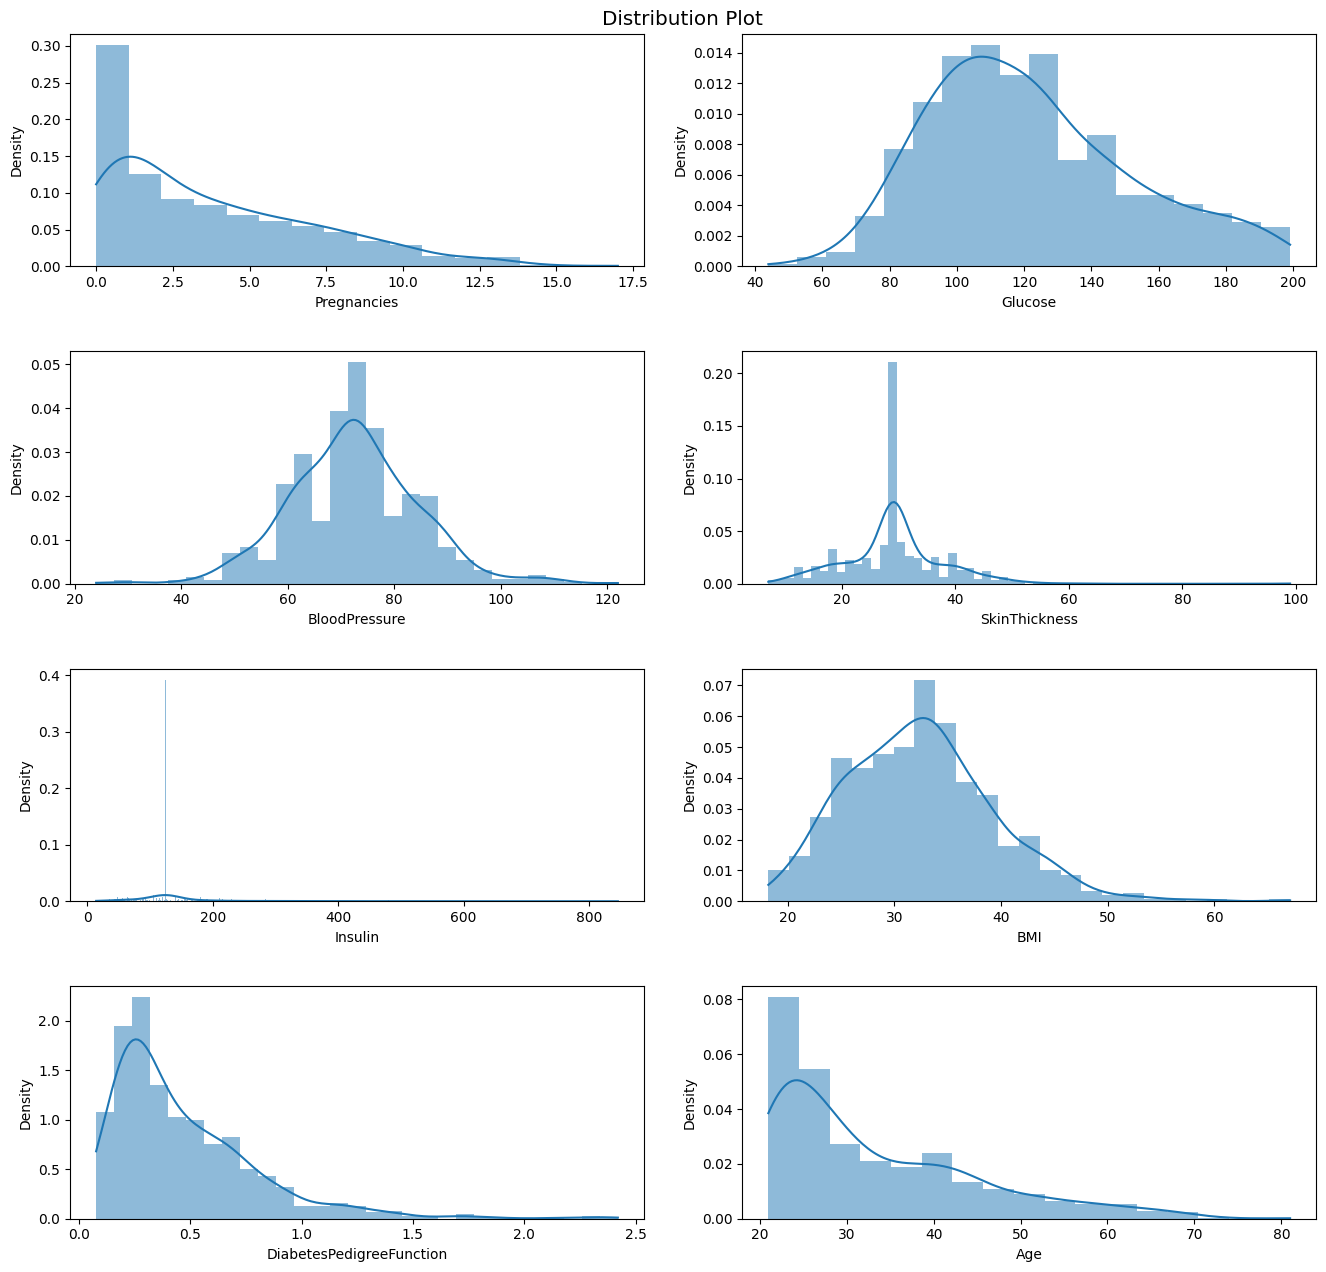

In [ ]:
pidStats(dfMeanMed)

In [ ]:
dfMeanMed.kurt() - ndata.kurt()

Pregnancies                 0.000000
Glucose                     0.019192
BloodPressure               0.186626
SkinThickness               2.495496
Insulin                     9.861933
BMI                         0.056843
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
# Choose an estimator if you don't want the default BayesianRidge() estimator
exEstimator = DecisionTreeRegressor(max_features='sqrt', random_state=42)
# Choose a style if you don't want the default ascending order
exStyle = 'descending'
# Imputer definition
exImputer = IterativeImputer(estimator=exEstimator, imputation_order=exStyle, random_state=42)

# Make a copy of copied dataset
edf = ndata.copy(deep = True)
# Fit on the dataset
exImputer.fit(edf)
# Transform and convert to a dataframe
exTrans = pd.DataFrame(exImputer.transform(edf), columns = edf.columns)
exTrans

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,245.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,55.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,19.0,132.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,194.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,23.0,846.0,30.1,0.349,47.0,1.0


In [ ]:
## check for null values after using the Iterative Imputer in non-pipeline mode
exTrans.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Descriptive Stats:


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.756510,30.577439,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,768.0,72.308594,12.391793,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,28.924479,10.510789,7.000,21.00000,29.0000,36.00000,99.00
Insulin,768.0,164.580729,129.770929,14.000,76.00000,126.0000,204.25000,846.00
BMI,768.0,32.428125,6.921562,18.200,27.47500,32.2500,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


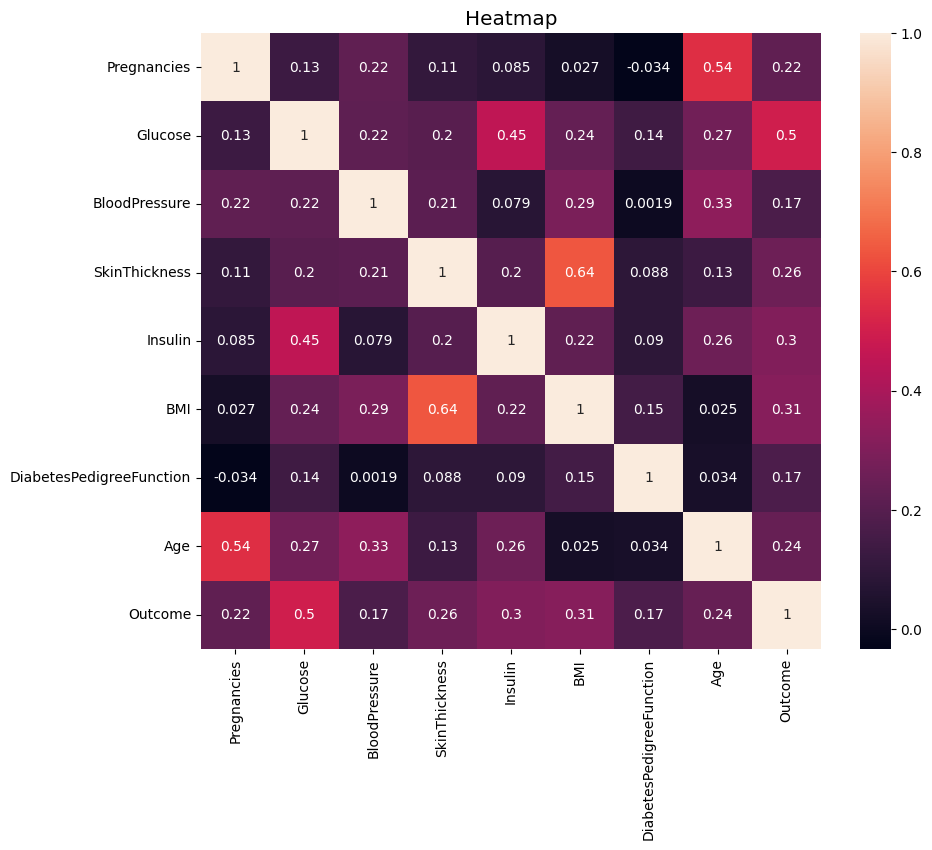

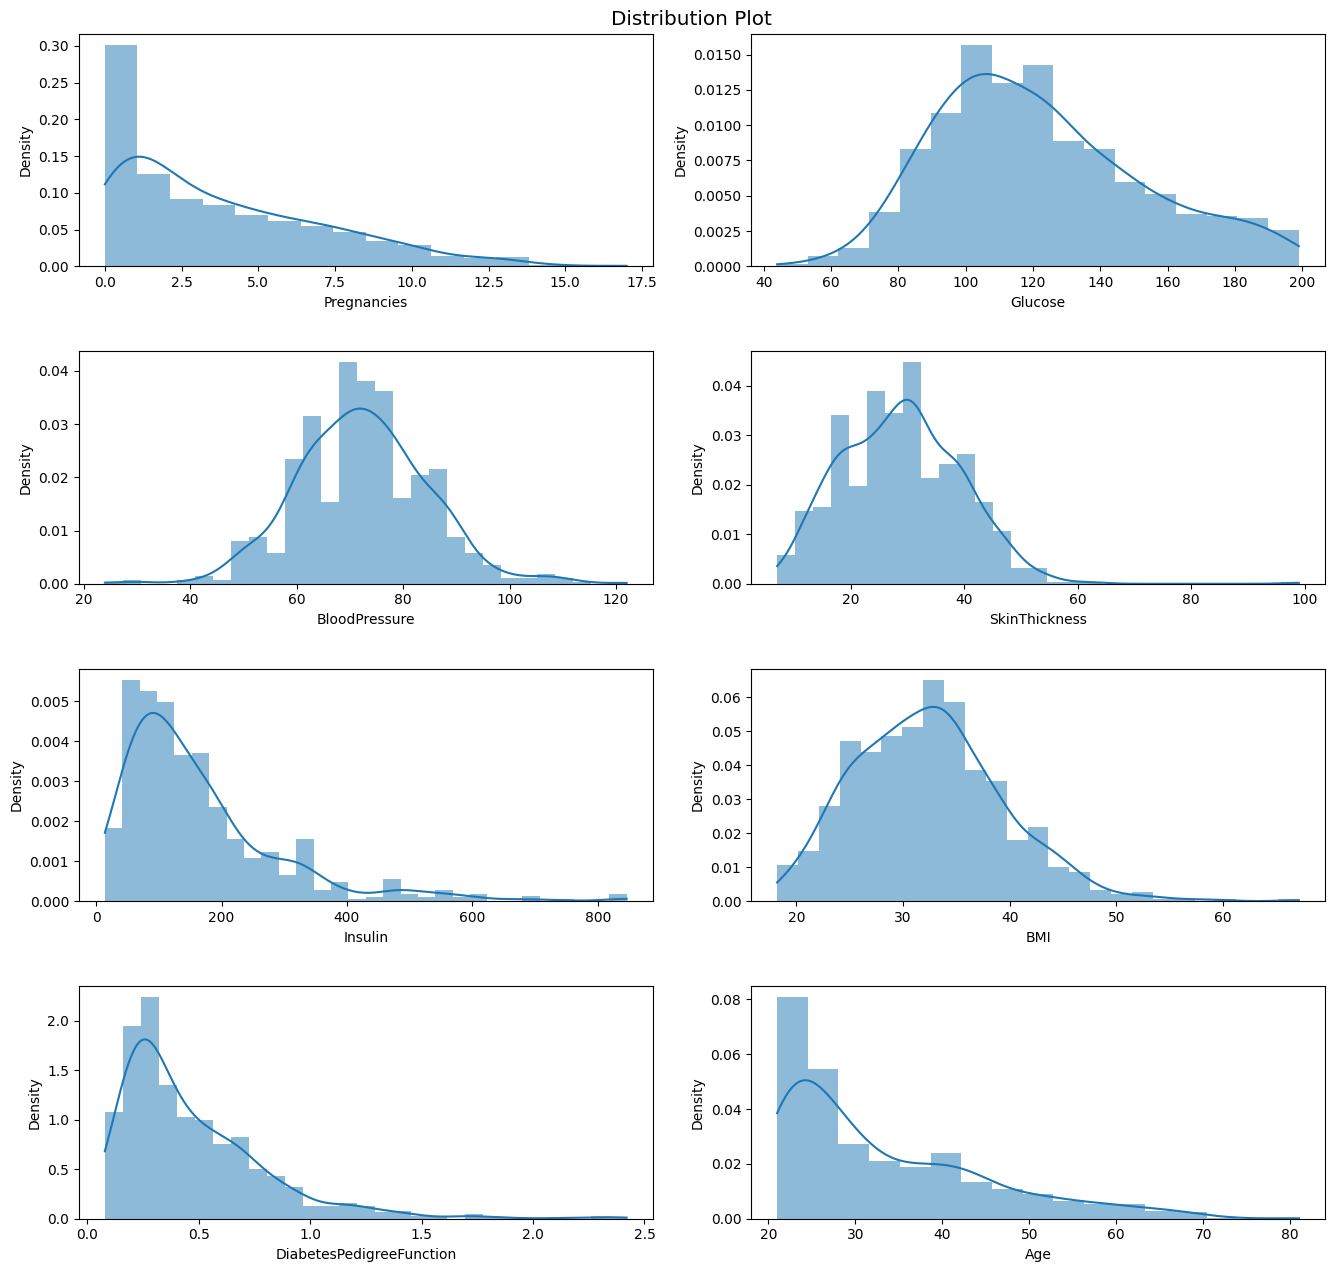

In [ ]:
pidStats(exTrans)

In [ ]:
## to check for zeroes in any of the colums
exTrans.le(0).any()

Pregnancies                  True
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                      True
dtype: bool

In [ ]:
edf.kurt() - ndata.kurt()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [ ]:
exTrans.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,245.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,55.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,19.0,132.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [ ]:
from imblearn.over_sampling import SMOTE
#os =  SMOTE()
X = exTrans.drop(['Outcome'], axis=1)
y = exTrans['Outcome']

### This resamples the dataset for SMOTE technique
sm = SMOTE(random_state=42, k_neighbors=5)
X_smote, y_smote = sm.fit_resample(X, y)
print("Before SMOTE:", y.value_counts())
print("After SMOTE:", y_smote.value_counts())
print(y_smote)

Before SMOTE: 0.0    500
1.0    268
Name: Outcome, dtype: int64
After SMOTE: 1.0    500
0.0    500
Name: Outcome, dtype: int64
0      1.0
1      0.0
2      1.0
3      0.0
4      1.0
      ... 
995    1.0
996    1.0
997    1.0
998    1.0
999    1.0
Name: Outcome, Length: 1000, dtype: float64


In [ ]:
# Convert the SMOTE-generated data into a Pandas DataFrame
smote_df = pd.DataFrame(X_smote, columns=X.columns)
smote_df['Outcome'] = y_smote

# View the first few rows of the SMOTE-generated data
smote_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   float64
 1   Glucose                   1000 non-null   float64
 2   BloodPressure             1000 non-null   float64
 3   SkinThickness             1000 non-null   float64
 4   Insulin                   1000 non-null   float64
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   float64
 8   Outcome                   1000 non-null   float64
dtypes: float64(9)
memory usage: 70.4 KB


In [ ]:
print(smote_df.describe())#, describe(), and value_counts() to 

       Pregnancies      Glucose  BloodPressure  SkinThickness      Insulin  \
count  1000.000000  1000.000000    1000.000000    1000.000000  1000.000000   
mean      4.041324   126.141600      72.667950      29.938508   176.372514   
std       3.313402    30.865878      12.017683      10.329367   131.116178   
min       0.000000    44.000000      24.000000       7.000000    14.000000   
25%       1.000000   103.000000      64.584381      22.247814    87.750000   
50%       3.000000   123.000000      72.000000      30.000000   140.000000   
75%       6.000000   146.023950      80.000000      37.044653   215.000000   
max      17.000000   199.000000     122.000000      99.000000   846.000000   

               BMI  DiabetesPedigreeFunction          Age     Outcome  
count  1000.000000               1000.000000  1000.000000  1000.00000  
mean     33.013271                  0.489482    33.897074     0.50000  
std       6.617693                  0.328170    11.186844     0.50025  
min      

In [ ]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n_samples, latent_dim)
	return x_input

In [ ]:
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	X = generator.predict(x_input)
	# create class labels
	y = np.zeros((n_samples, 1))
	return X, y

In [ ]:
# generate n real samples with class labels
def generate_real_samples(n):
  X = data.sample(n)

  #generate class labels
  y = np.ones((n, 1))
  return X, y

In [ ]:
# define the standalone generator model
def define_generator(latent_dim, n_outputs=9):
  model = Sequential()
  model.add(Dense(15, activation='relu', kernel_initializer='he_uniform', input_dim=latent_dim))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(n_outputs, activation='linear'))

  return model

In [ ]:
generator1 = define_generator(10, 9)
generator1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                165       
                                                                 
 dense_1 (Dense)             (None, 30)                480       
                                                                 
 dense_2 (Dense)             (None, 9)                 279       
                                                                 
Total params: 924
Trainable params: 924
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# define the standalone discriminator model
def define_discriminator(n_inputs=9):
  model = Sequential()
  model.add(Dense(25, activation='relu', kernel_initializer='he_uniform', input_dim=n_inputs))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
	# compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
discriminator1 = define_discriminator(9)
discriminator1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 25)                250       
                                                                 
 dense_4 (Dense)             (None, 50)                1300      
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# define the combined generator and discriminator model, for updating the generator
def define_gan(generator, discriminator):
	# make weights in the discriminator not trainable
	discriminator.trainable = False
	# connect them
	model = Sequential()
	# add generator
	model.add(generator)
	# add the discriminator
	model.add(discriminator)
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model

In [ ]:
# create a line plot of loss for the gan and save to file
def plot_history(d_hist, g_hist):
	# plot loss
	plt.subplot(1, 1, 1)
	plt.plot(d_hist, label='d')
	plt.plot(g_hist, label='gen')
	plt.show()
	plt.close()

In [ ]:
# train the generator and discriminator
def train(g_model, d_model, gan_model, latent_dim, n_epochs=10000, n_batch=128):
  
  # determine half the size of one batch, for updating the discriminator
  half_batch = int(n_batch / 2)

  d_history = []
  g_history = []
  
  # manually enumerate epochs
  for epoch in range(n_epochs):
    # prepare real samples
    x_real, y_real = generate_real_samples(half_batch)
    # prepare fake examples
    x_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
    # update discriminator
    d_loss_real, d_real_acc = d_model.train_on_batch(x_real, y_real)
    d_loss_fake, d_fake_acc = d_model.train_on_batch(x_fake, y_fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    
    # prepare points in latent space as input for the generator
    x_gan = generate_latent_points(latent_dim, n_batch)
    
    # create inverted labels for the fake samples
    y_gan = np.ones((n_batch, 1))
    
    # update the generator via the discriminator's error
    g_loss_fake = gan_model.train_on_batch(x_gan, y_gan)

    print('>%d, d1=%.3f, d2=%.3f d=%.3f g=%.3f' % (epoch+1, d_loss_real, d_loss_fake, d_loss,  g_loss_fake))
    d_history.append(d_loss)
    g_history.append(g_loss_fake)

  plot_history(d_history, g_history)

    # if i==999:
    #   np.savetxt("new_X.csv", X, delimiter=",")
    
    # evaluate the model every n_eval epochs
    # if (i+1) % n_eval == 0:
    #   summarize_performance(i, g_model, d_model, latent_dim)
  g_model.save('trained_generated_model.h5')
  

In [ ]:
# evaluate the discriminator and plot real and fake points
def summarize_performance(epoch, generator, discriminator, latent_dim, n=100):
	# prepare real samples
	x_real, y_real = generate_real_samples(n)
	# evaluate discriminator on real examples
	_, acc_real = discriminator.evaluate(x_real, y_real, verbose=0)
	# prepare fake examples
	x_fake, y_fake = generate_fake_samples(generator, latent_dim, n)
	# evaluate discriminator on fake examples
	_, acc_fake = discriminator.evaluate(x_fake, y_fake, verbose=0)
	# summarize discriminator performance
	print(epoch, acc_real, acc_fake)
  # scatter plot real and fake data points
	pyplot.scatter(x_real[:, 0], color='red')
	pyplot.scatter(x_fake[:, 0], color='blue')
	pyplot.show()

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 4ms/step
>7501, d1=0.817, d2=0.264 d=0.541 g=2.110
2/2 [==============================] - 0s 6ms/step
>7502, d1=1.441, d2=0.225 d=0.833 g=1.753
2/2 [==============================] - 0s 4ms/step
>7503, d1=1.414, d2=0.421 d=0.918 g=1.162
2/2 [==============================] - 0s 6ms/step
>7504, d1=1.056, d2=0.783 d=0.920 g=0.837
2/2 [==============================] - 0s 4ms/step
>7505, d1=1.023, d2=1.052 d=1.038 g=0.855
2/2 [==============================] - 0s 3ms/step
>7506, d1=0.643, d2=0.824 d=0.734 g=1.271
2/2 [==============================] - 0s 13ms/step
>7507, d1=0.745, d2=0.321 d=0.533 g=1.823
2/2 [==============================] - 0s 5ms/step
>7508, d1=1.027, d2=0.201 d=0.614 g=2.560
2/2 [==============================] - 0s 4ms/step
>7509, d1=1.316, d2=0.166 d=0.741 g=2.336
2/2 [==============================] - 0s 8ms/step
>7510, d1=0.908, d2=0.231 d=0.570 g=1.860
2/2 [=============

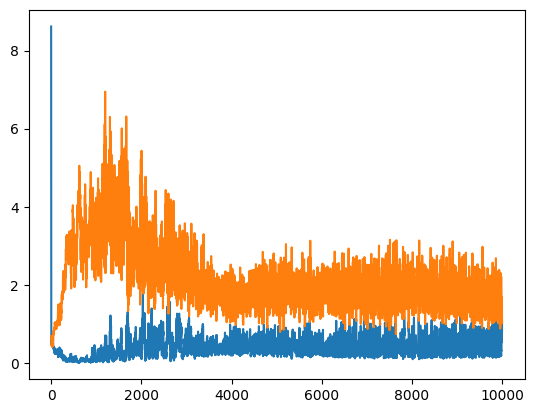

In [ ]:
# size of the latent space
latent_dim = 10
# create the discriminator
discriminator = define_discriminator()
# create the generator
generator = define_generator(latent_dim)
# create the gan
gan_model = define_gan(generator, discriminator)
# train model
train(generator, discriminator, gan_model, latent_dim)

In [ ]:
from keras.models import load_model
model = load_model('/content/trained_generated_model.h5')
model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
latent_points = generate_latent_points(10, 4000)

In [ ]:
X_syn = model.predict(latent_points)

125/125 [==============================] - 0s 2ms/step


In [ ]:
data_fake = pd.DataFrame(data=X_syn,  columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])
data_fake = data_fake.astype({"Pregnancies":"int","Glucose":"int","BloodPressure":"int","SkinThickness":"int","Insulin":"int","Age":"int"})

In [ ]:
data_fake.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,130,58,4,0,14.264879,-1.109887,11,0.321615
1,2,86,58,10,0,19.532572,-0.506211,30,0.375040
2,1,69,34,2,0,16.100828,0.297040,20,0.740733
3,8,135,97,41,1,35.080894,0.594908,63,1.731396
4,3,95,63,17,0,33.144604,0.376410,28,1.191434


In [ ]:
data_fake.Outcome.min()

-0.49733683

In [ ]:
data_fake.Outcome.max()

3.891763

In [ ]:
outcome_mean = data_fake.Outcome.mean()
data_fake['Outcome'] = data_fake['Outcome'] > outcome_mean
data_fake['Outcome']
data_fake["Outcome"] = data_fake["Outcome"].astype(int)
data_fake.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,130,58,4,0,14.264879,-1.109887,11,0
1,2,86,58,10,0,19.532572,-0.506211,30,0
2,1,69,34,2,0,16.100828,0.297040,20,0
3,8,135,97,41,1,35.080894,0.594908,63,1
4,3,95,63,17,0,33.144604,0.376410,28,1


In [ ]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

label = ['Outcome']
X_fake_created = data_fake[features]
y_fake_created = data_fake[label]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X_fake_train, X_fake_test, y_fake_train, y_fake_test = train_test_split(X_fake_created, y_fake_created, test_size=0.30, random_state=42)
clf_fake = RandomForestClassifier(n_estimators=100)
clf_fake.fit(X_fake_train,y_fake_train)

y_fake_pred=clf_fake.predict(X_fake_test)
print("Accuracy of fake data model:",metrics.accuracy_score(y_fake_test, y_fake_pred))
print("Classification report of fake data model:",metrics.classification_report(y_fake_test, y_fake_pred))


Accuracy of fake data model: 0.9508333333333333
Classification report of fake data model:               precision    recall  f1-score   support

           0       0.95      0.96      0.96       705
           1       0.94      0.94      0.94       495

    accuracy                           0.95      1200
   macro avg       0.95      0.95      0.95      1200
weighted avg       0.95      0.95      0.95      1200



In [ ]:
X_final = X_syn[:, :8]
print ('X_final: ', X_final[:3])

y_final = X_syn[:, :]
print ('y_final: ', y_final[:3])

X_final:  [[ -0.7913795  130.9082      58.301407     4.2659845   -0.1962102
   14.264879    -1.1098874   11.343916  ]
 [  2.4823506   86.82202     58.396683    10.9211035    0.38116384
   19.532572    -0.5062105   30.858292  ]
 [  1.7941796   69.56949     34.05424      2.931085     0.51760256
   16.100828     0.29704025  20.453527  ]]
y_final:  [[ -0.7913795  130.9082      58.301407     4.2659845   -0.1962102
   14.264879    -1.1098874   11.343916     0.32161513]
 [  2.4823506   86.82202     58.396683    10.9211035    0.38116384
   19.532572    -0.5062105   30.858292     0.3750402 ]
 [  1.7941796   69.56949     34.05424      2.931085     0.51760256
   16.100828     0.29704025  20.453527     0.74073297]]


In [ ]:
X_syn_pred = X_syn[:,:8]

In [ ]:
y_fake_pred = clf_true.predict(X_syn_pred)

In [ ]:
y_fake_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
data_fake.shape

(4000, 9)

In [ ]:
data.shape

(768, 9)

In [ ]:
data_fake.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,130,58,4,0,14.264879,-1.109887,11,0
1,2,86,58,10,0,19.532572,-0.506211,30,0
2,1,69,34,2,0,16.100828,0.297040,20,0
3,8,135,97,41,1,35.080894,0.594908,63,1
4,3,95,63,17,0,33.144604,0.376410,28,1


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
!pip install table_evaluator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.0/285.0 kB 31.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of table-evaluator to determine which version is compatible with other requirements. This could take a while.


In [ ]:
!pip install seaborn==0.11.1
from table_evaluator import load_data, TableEvaluator

In [ ]:
table_evaluator = TableEvaluator(data, data_fake)

In [ ]:
table_evaluator.evaluate(target_col='Outcome')

In [ ]:
table_evaluator.visual_evaluation()

In [ ]:
## To visualize outliers in the fake data
for column in data_fake.columns:
    sns.boxplot(x=data_fake[column])
    plt.title(column)
    plt.show()

In [ ]:
'''
To replace negative values in Pima Indian diabetes dataset columns with the median:
'''
# Create a copy of the dataset
clean_df = data_fake.copy()

# Replace negative values with the median for each column in the copy of the dataset
for column in data_fake.columns:
    median = data_fake[column][data_fake[column] >= 0].median()
    clean_df[column][data_fake[column] < 0] = median
'''
This code uses a for loop to iterate over each column in the Pima Indian Diabetes dataset. 
For each column, it calculates the median of the non-negative values using the median() function from pandas, 
and then replaces any negative values in that column with the median using boolean indexing.
'''

In [ ]:
# view the dataset
clean_df.head()

In [ ]:
'''
The code defines a dictionary ranges that specifies the range of values for each column. 
It then creates an empty dataframe scaled_df to store the scaled data. 
The code loops through each column in the original dataframe and checks if it is a numeric column that needs to be scaled. 
If it is, the code applies the StandardScaler preprocessing technique to the column, scales the data to the specified range, 
and adds the scaled column to the scaled_df dataframe. 
If it is a non-numeric column, the column is simply added to the scaled_df dataframe.

The scaled_df dataframe contains the scaled values for each column within the specified range of values. 
The reshape() method is used to convert the scaled column from a 2-dimensional array to a 1-dimensional array. 
The head() method is used to display the first 5 rows of the scaled dataframe.
'''
# Define the ranges for each column
ranges = {
    0: [0, 17],    # Pregnancies
    1: [0, 199],   # Glucose
    2: [0, 122],   # BloodPressure
    3: [0, 99],   # SkinThickness
    4: [0, 846],   # Insulin
    5: [0, 68],   # BMI
    6: [0, 3],   # DiabetesPedigreeFunction
    7: [21, 81],   # Age
    8: [0, 1]    # Outcome
}
# Create an empty dataframe to store the scaled data
scaled_df = pd.DataFrame()
# Loop through each column and scale it individually
for column in clean_df.columns:
    if column in ranges:
        # Create a StandardScaler object
        scaler = StandardScaler()
        # Fit and transform the column using the scaler object
        scaled_column = scaler.fit_transform(clean_df[[column]])
        # Scale the data to the specified range
        scaled_column = (scaled_column - scaled_column.min()) / (scaled_column.max() - scaled_column.min()) * (ranges[column][1] - ranges[column][0]) + ranges[column][0]
        # Add the scaled column to the dataframe
        scaled_df[column] = scaled_column.reshape(-1,)
    else:
        # Add non-numeric columns to the dataframe
        scaled_df[column] = clean_df[column]

# Display the first 5 rows of the scaled dataframe
scaled_df.head()

In [ ]:
scaled_df.Glucose.max()
for column in scaled_df.columns:
    sns.boxplot(x=scaled_df[column])
    plt.title(column)
    plt.show()

In [ ]:
X_samples = clean_df.iloc[:, :-1].values
y_samples = clean_df.iloc[:, -1].values

# X_samples = clean_df.iloc[:, :-1].values
# y_samples = clean_df.iloc[:, -1].values

# split the dataset into training and testing sets
X_train_mod, X_test_mod, y_train_mod, y_test_mod = train_test_split(X_samples, y_samples, test_size=0.2, random_state=42)

# reshape the input data
X_train_lstm = np.reshape(X_train_mod, (X_train_mod.shape[0], 1, X_train_mod.shape[1]))
X_test_lstm = np.reshape(X_test_mod, (X_test_mod.shape[0], 1, X_test_mod.shape[1]))


In [ ]:
X_test_mod.shape

In [ ]:
from keras.optimizers import Adam
# define the LSTM model
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(1, X_train_mod.shape[1])))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=32, return_sequences=True))
model.add(Dropout(0.2))
# Add the final LSTM layer
model.add(LSTM(units=16))
# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# model.add(LSTM(units=64, return_sequences=True, activation='sigmoid'))
# model.add(Dropout(0.2))
# model.add(Dense(units=64, activation='sigmoid'))
# model.add(Dense(units=32, activation='sigmoid'))
# model.add(Dense(units=1, activation='sigmoid'))

# Set the learning rate of the Adam optimizer
adam_optimizer = Adam(learning_rate=0.001)
# compile the model
model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# train the model
model.fit(X_train_lstm, y_train_mod, epochs=200, batch_size=32)

# evaluate the model on the testing set
loss, accuracy = model.evaluate(X_test_lstm, y_test_mod)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# predict the class labels for the testing set
y_pred = model.predict(X_test_lstm)
y_pred = (y_pred > 0.5).astype(int)

# print the confusion matrix
cm = confusion_matrix(y_test_mod, y_pred)
print("Confusion Matrix:")
print(cm)

# normalize the matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# plot the matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_norm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# print the classification report
report = classification_report(y_test_mod, y_pred)
print("Classification Report:")
print(report)

In [ ]:
from sklearn.metrics import roc_curve, auc

# predict probabilities for test set
y_pred_prob = model.predict(X_test_lstm)

# calculate fpr, tpr and threshold values
fpr, tpr, threshold = roc_curve(y_test_mod, y_pred_prob)

# calculate AUC score
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
history = model.fit(X_train_lstm, y_train_mod, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()